# Project: Investigate a Dataset - The Movie Database Review and Revenue

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## 1. Introduction

The Movie Database (TMDb) is a collaborative database about movies . The project was founded by Travis Bell in 2008 to collect movie posters. The initial database was a donation from the free Open Media Database(omdb) project. TMDb is a competitor project to the commercial Internet Movie Database. The objective of the project is to analysis the data to get more insight and get answer the research questions.

### a). Dataset Description

The dataset to use for this project can be found [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True).

Below is the dataset glossary:

* id - The identification number of the Movie in the dataset
* imdb_id - The identification number of the Movie in the imdb
* popularity - The score of a movie being liked
* budget - The total cost for the production of a movie
* revenue - The total income from a movie
* original_title - The name of the movie
* cast - The actors in the movies
* homepage - The website link to the movies
* director - The director of the movie
* tagline - A catch phrase of the movie
* keywords - Unique words associated with the movie
* overview - A small explanation of the movie
* runtime - The time period for the movie
* genres - The classification type of the movie
* production_companies - The companies that were involved in the production of the movie
* release_date - The date a movie was released
* vote_count - The vote number a  movie received
* vote_average - The average votes received
* release_year - The year of release
* budget_adj - The budget of the associated movie in terms of 2010 dollars, accounting for inflation over time
* revenue_adj - The revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time

### b). Research Questions for Analysis

#### **i). Which genres are most popular from year to year?**

#### **ii). What kinds of properties are associated with movies that have high revenues?**

#### **iii). Does vote average affect revenues?**

#### **iv). Which Production Company have the highest number of Movie titles and revenue?**

## 2. Data Wrangling

### a). Importing the Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
%matplotlib inline


### b). Loading the Data

In [2]:
movies_df = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv")

### c). Accessing the Data

In [3]:
# Checking the top 3 rows of the dataframe

movies_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
# Checking the bottom 3 rows of the dataframe

movies_df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
# Checking the shape of the dataframe

print(f'The dataframe has {movies_df.shape[0]} rows and {movies_df.shape[1]} columns')

The dataframe has 10866 rows and 21 columns


In [6]:
# Checking the columns of the dataframe

print(movies_df.columns)

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


In [7]:
# Checking more information about the dataframe

print(movies_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### c). Tidying the Dataset

### i). Checking for Null Values

This process involves checking for the missing values in the dataset and dealing with them.

In [8]:
total = movies_df.isnull().sum().sort_values(ascending=False)
percentage = (movies_df.isnull().sum()/movies_df.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
missing_value.head(10)

,Total,Percentage
homepage,7930,72.979937
tagline,2824,25.989324
keywords,1493,13.740107
production_companies,1030,9.479109
cast,76,0.699429
director,44,0.404933
genres,23,0.211669
imdb_id,10,0.092030
overview,4,0.036812
popularity,0,0.000000


#### Dealing with the missing values

* From the above we can see we have close to 73% of missing values in the homepage column and we shall proceed to drop the entire 
columns since the remaining observations will affect our analysis due to low numbers.
* We shall also drop the  tagline,keywords column, imdb, overview and id in as much as it does not have missing values
  since they are not relevant to our analysis.
* The other columns, we shall drop only the missing values

In [9]:
# Dropping the unnecessary columns

movies_df.drop(['homepage','keywords','imdb_id','overview','tagline'],axis=1,inplace=True)

In [10]:
# Dropping the rows with null values

movies_df.dropna(axis=0,inplace=True)

In [11]:
# Checking that the dataframe has no null values

movies_df.isnull().sum().sum()

0

#### ii). Checking for Duplicates

In [12]:
movies_df.duplicated().sum()

1

We only have one duplicate record and we shall drop.

In [13]:
# Dropping the duplicated rows

movies_df.drop_duplicates(inplace=True)

In [14]:
# Confirming

movies_df.duplicated().sum()

0

#### iii). Checking the Datatypes

In [15]:
movies_df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### Correcting the Datatypes

* The release_date column should be in datetime format

In [16]:
# Converting the release date column to the appropriate data type

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

In [17]:
# Checking to confirm that the data type of the release date column is now a datetime object

movies_df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

## iv). Data Consistency

In [18]:
# We shall categorize the genres properly

genres_unique =  pd.DataFrame(movies_df.genres.str.split('|').tolist()).stack().unique()

genres_unique = pd.DataFrame(genres_unique, columns=['genre'])

# We shall then merge the genres with the movies dataframe

movies_df = movies_df.join(movies_df.genres.str.get_dummies().astype(bool))

# We shall then drop the genres column

movies_df.drop(['genres'],axis=1,inplace=True)

In [19]:
# Checking the dataframe

movies_df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [20]:
# We shall rename the columns appropriately

movies_df.rename(columns = lambda x: x.replace(' ','_').lower(),inplace = True)

# Confirming to check the change

movies_df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'action', 'adventure', 'animation', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'foreign', 'history',
       'horror', 'music', 'mystery', 'romance', 'science_fiction', 'tv_movie',
       'thriller', 'war', 'western'],
      dtype='object')

## 3). Exploratory Data Analysis(EDA)

We shall first do the Univariate analysis. This is the simplest form of analyzing data. “Uni” means “one”, so in other words the analysis involves only one variable. It doesn’t deal with causes or relationships and it’s major purpose is to describe. It takes data, summarizes that data and finds patterns in the data.

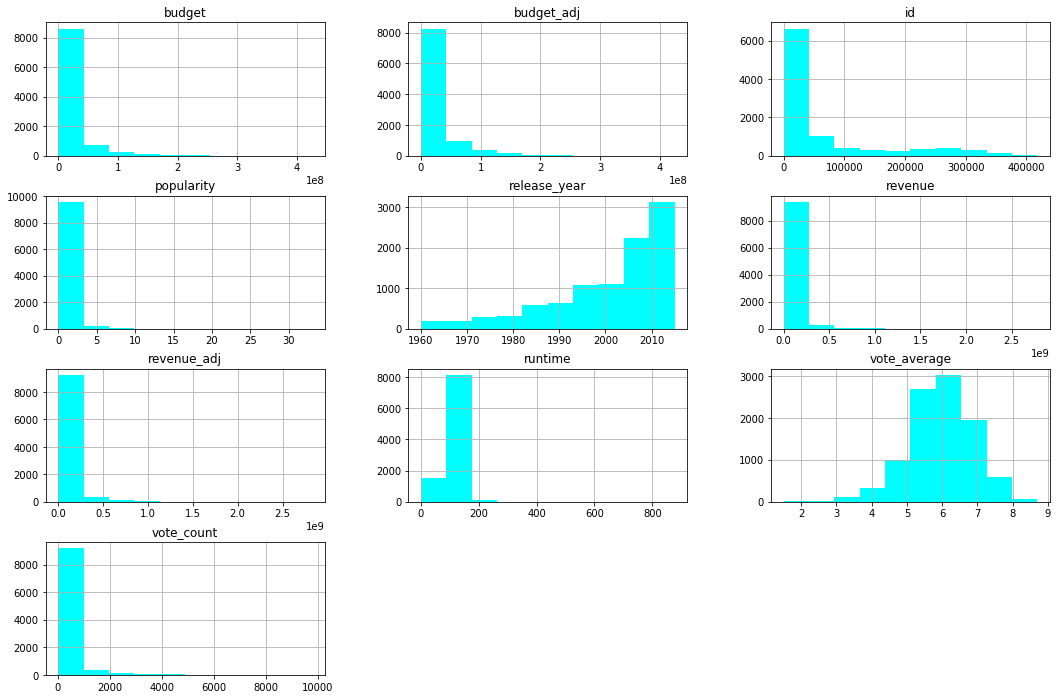

In [25]:
# Plotting Histogram for the Numeric columns

num_cols = movies_df[movies_df.select_dtypes(include=['float64','int64']).columns]


num_cols.hist(bins=10, figsize=[18,12], color = 'cyan')
plt.show()

*  <span style="color:green"></style> We can clear see that Movie production has been increasing over the years.

*  <span style="color:green"></style> We can also see that the average vote is around 6 for most movies. 

In [26]:
# Using barplot to plot the categorical columns

# Selecting categorical columns

cat_cols = movies_df.select_dtypes(include=['object']).columns

cat_cols

Index(['original_title', 'cast', 'director', 'production_companies'], dtype='object')

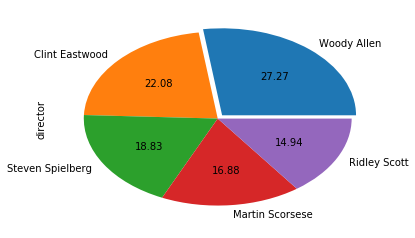

In [40]:
# Plotting pie chart for directors
explode=(0.05, 0,0,0,0)

movies_df.director.value_counts().head(5).plot(kind='pie',autopct='%.2f',explode=explode);

<span style="color:green"></style>We can clearly see that of the top 5 directors, Woody Allen is the one with the most movies

We can also do Bivariate statistical analyses. This type uses two variables (e.g. self-efficacy and academic performance). Bivariate analyses can be descriptive (e.g. a scatterplot), but the goal is typically to compare or examine the relationship between two variables. For instance, researchers may examine whether student self-efficacy in mathematics is a significant predictor of mathematics standardized test scores. 

In [36]:
# Creating a function to plot the various scatterplot

def scatter_plot(x,y,color,title):
    movies_df.plot(x,y,kind='scatter',color=color,title=title)

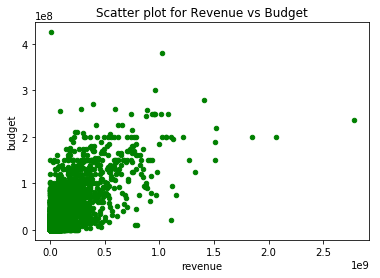

In [37]:
# Scatter plot for Revenue vs Budget

scatter_plot('revenue','budget','green','Scatter plot for Revenue vs Budget')

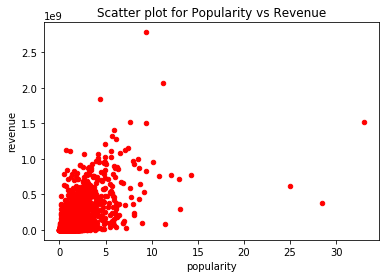

In [38]:
# Scatterplot to compare the popularity and revenue

scatter_plot('popularity','revenue','red','Scatter plot for Popularity vs Revenue')

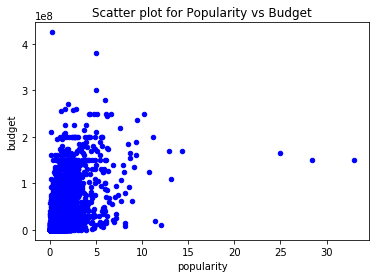

In [40]:
# Scatterplot to compare the popularity and budget

scatter_plot('popularity','budget','blue','Scatter plot for Popularity vs Budget')

## 4. Answering the Research questions for Analysis

#### **i). Which genres are most popular from year to year?**

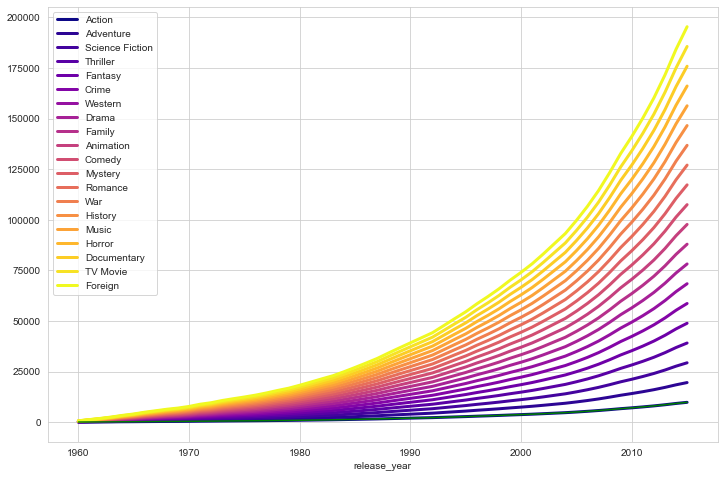

In [292]:
df_movi = movies_df[['id','release_year']].groupby('release_year')

df = pd.DataFrame({'Movies' : df_movi.id.nunique().cumsum()})

for genre in genres_unique.genre:
    df_movie = movies_df[movies_df[genre]][['id','release_year']].groupby('release_year')
    df[genre] = df_movi.id.nunique().cumsum()
    
  
df.loc[:,df.columns != 'Movies'].plot(stacked=True, figsize=(12,8),linewidth=3, cmap='plasma')
plt.plot(df['Movies'], color='green');

<span style="color:green"></style> We can see from the above that Foreign Movies have been having the highest increase popularity rate over the years while Action
movies have been having the lowest rate. 

#### **ii). What kinds of properties are associated with movies that have high revenues?**

We shall select movies above median to be of high revenue

In [321]:
# We shall create bins to categorize revenue

movies_df['revenue_category'] = movies_df.revenue.apply(lambda x: 'High' if x > movies_df.revenue.median() else 'Low')


In [320]:
# Movies with high and low revenue categories

movies_df.groupby('revenue_category').mean().astype(int)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
revenue_category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High,44390,1,30125984,90995236,108,444,6,2000,35822885,117373227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Low,80970,0,2988707,0,97,44,5,2000,3897720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<span style="color:green"></style> We can clearly see that most of the movies with high revenue are usually associated with High popularity, runtime, vote_count,vote_average and adjusted revenue

#### **iii). Does vote average affect revenues?**

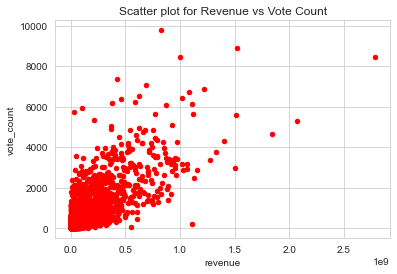

In [331]:
# We shall plot a scatter plot to compare the revenue and Vote Count

movies_df.plot(x='revenue', y='vote_count', kind='scatter', color='red', title='Scatter plot for Revenue vs Vote Count');

<span style="color:green"></style> From the above we can easily tell the higher the vote count, the higher the revenue from the movie title

#### **iv). Which Production Company have the highest number of Movie titles and revenue?**

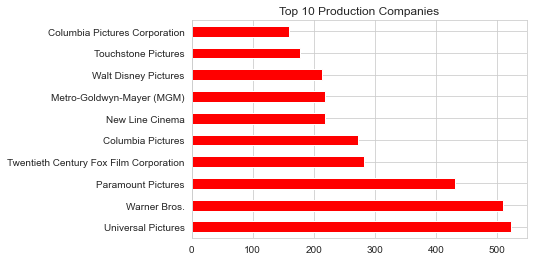

In [342]:
# We shall split the individual companies in the production_companies column

df_movies = movies_df.production_companies.str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
df_movies.name = 'production_companies'

df_movies.value_counts().head(10).plot(kind='barh', color='red', title='Top 10 Production Companies');

<span style="color:green"></style> We can clear see that Universal Pictures is the most popular production company

## 5. Conclusion

From the analysis, we can note that Foreign movies, Tv Movie and Documentaries have being getting more common with time and since most movies have an average vote rating of 6, that means slightly more people are preferring the content.

The more budget is invested in a movie production, the higher the chances of the revenue being high and this can be clearly shown by the revenue behavior of the top companies like Universal Pictures, Warner Bros and Paramount pictures.

We can also note that most High voted movies are associated which a much longer runtime.

**Limitation**

The 'keyword' and 'tagline' columns could have been important features in the text analysis but it was severely affected by many null values.